## Import Libraries & Load Dataset

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

## Face Mask Dataset

In [2]:
image_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
image_generator_val = ImageDataGenerator(
    rescale = 1.0 / 255.0
)
image_generator_test = ImageDataGenerator(
    rescale = 1.0 / 255.0
)

In [3]:
Train = image_generator.flow_from_directory(
    "/content/drive/MyDrive/Dataset/FaceMask/Face Mask Dataset/Train",
    class_mode = "binary",
    batch_size = 32,
    target_size = (224,224)
)
Val = image_generator_val.flow_from_directory(
    "/content/drive/MyDrive/Dataset/FaceMask/Face Mask Dataset/Validation",
    class_mode = "binary",
    batch_size = 32,
    target_size = (224,224)
)
Test = image_generator_test.flow_from_directory(
    "/content/drive/MyDrive/Dataset/FaceMask/Face Mask Dataset/Test",
    class_mode = "binary",
    batch_size = 32,
    target_size = (224,224)
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


# Model
# Transfer Learning
## MobileNetV2

In [4]:
model_mobilenet = MobileNetV2(weights="imagenet",input_shape=(224,224,3),include_top=False)

In [5]:
model_mobilenet.trainable = False
model = Sequential()
model.add(model_mobilenet)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [6]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("FaceMask_Model.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [7]:
history = model.fit_generator(
    Train,
    steps_per_epoch = len(Train),
    epochs = 10,
    validation_data = Val,
    validation_steps = len(Val),
    callbacks = [checkpoint]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
313/313 [==============================] - 1609s 5s/step - loss: 0.2734 - accuracy: 0.9734 - val_loss: 0.0412 - val_accuracy: 0.9925
Epoch 2/10
313/313 [==============================] - 163s 521ms/step - loss: 0.0365 - accuracy: 0.9922 - val_loss: 0.0445 - val_accuracy: 0.9925
Epoch 3/10
313/313 [==============================] - 166s 531ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0618 - val_accuracy: 0.9912
Epoch 4/10
313/313 [==============================] - 165s 526ms/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.0286 - val_accuracy: 0.9950
Epoch 5/10
313/313 [==============================] - 164s 524ms/step - loss: 0.0129 - accuracy: 0.9955 - val_loss: 0.0364 - val_accuracy: 0.9912
Epoch 6/10
313/313 [==============================] - 163s 519ms/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.0411 - val_accuracy: 0.9950
Epoch 7/10
313/313 [==============================] - 162s 517ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0148 - v

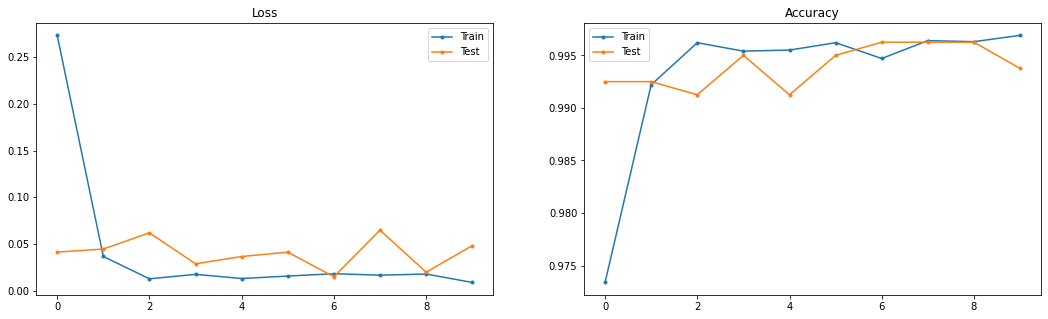

In [8]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

In [9]:
model.evaluate(Test)

31/31 [==============================] - 239s 8s/step - loss: 0.0276 - accuracy: 0.9919


[0.02761963941156864, 0.9919354915618896]